**消费行为分析**
## 数据
- 用户消费行为的分析报告
- 数据来源于网上，在一间CD网站上的消费记录
- 数据大小：69659 * 4
    * 第一列：user_id    用户id
    * 第二列：order_dt   购买日期
    * 第三列：order_products   购买产品数
    * 第四列：order_amount    购买金额

In [1]:
import numpy as np
import pandas as pd

In [8]:
columns = ['user_id','order_dt','order_products','order_amount']
df = pd.read_table('CDNOW_master.txt',names = columns,sep='\s+')
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_dt        69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order_amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


- 购买日期为int64，在实际情况中应该为日期格式

In [9]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


- 订单中商品平均值2.4，存在极值干扰
- 订单中消费金额的平均朱35.87，存在极值干扰

In [17]:
df['order_dt'] = pd.to_datetime(df.order_dt,format='%Y%m%d')
df['month'] = df.order_dt.values.astype('datetime64[M]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         69659 non-null  int64         
 1   order_dt        69659 non-null  datetime64[ns]
 2   order_products  69659 non-null  int64         
 3   order_amount    69659 non-null  float64       
 4   month           69659 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 2.7 MB


In [18]:
df

,user_id,order_dt,order_products,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01
...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04-01
69655,23568,1997-04-22,1,14.99,1997-04-01
69656,23569,1997-03-25,2,25.74,1997-03-01
69657,23570,1997-03-25,3,51.12,1997-03-01


## 按照月份进行消费趋势的分析
* 每月的消费总额
* 每月的消费次数
* 每月的产品购买量
* 每月的消费人数

In [20]:
# 按照月份进行分组
grouped_month = df.groupby('month')
order_month_amount = grouped_month.order_amount.sum()
order_month_amount.head()



month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
Name: order_amount, dtype: float64

In [23]:
#连写
df.groupby('month')['order_amount'].sum().head()

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
Name: order_amount, dtype: float64

### 进行数据可视化
* 每个月份的销售额展示
#### 消费金额与月份

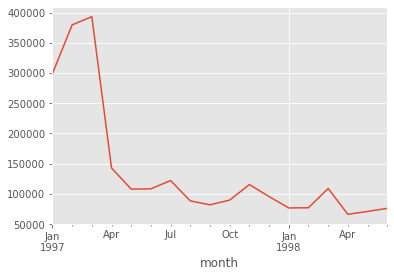

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')#更改画图风格
order_month_amount.plot()

由上图可以看出，前三个月消费金额达到最高峰，后续则比较平稳，相比较来说有下降趋势

#### 消费订单与月份

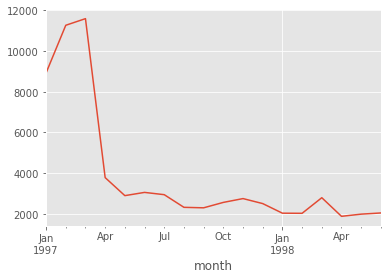

In [27]:
grouped_month['user_id'].count().plot()

可以看出前三个月消费订单比较多达10000+笔，随后几个月人数变少，平均在2500人

#### 消费产品与月份


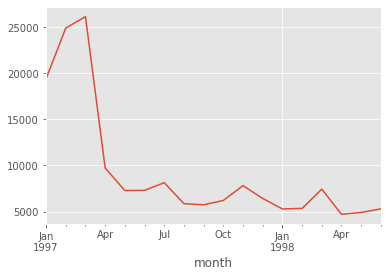

In [30]:
grouped_month['order_products'].sum().plot()

有图上可以看出，前三个月比较多
#### 每个月每人的消费情况

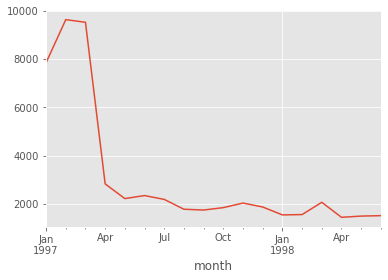

In [33]:
df.groupby('month')['user_id'].apply(lambda x:len(x.drop_duplicates())).plot()

#其他去重方法
#df.groupby(['month','user_id']).count().reset_index()

对每个月份每个人的消费情况进行统计
前三个月每个月的消费人数在8000-10000，后续月份，平均消费人数在2000以下

#### 数据透视


In [39]:
df.pivot_table(index='month',
              values=['order_products','order_amount','user_id'],
               aggfunc={'order_products':'sum',
                       'order_amount':'sum',
                       'user_id':'count'}).head()

,order_amount,order_products,user_id
month,,,
1997-01-01,299060.17,19416,8928
1997-02-01,379590.03,24921,11272
1997-03-01,393155.27,26159,11598
1997-04-01,142824.49,9729,3781
1997-05-01,107933.30,7275,2895


## 用户个体消费